# Getting and clearing dataset

For the dataset we propose to use [Thingi10K dataset](https://ten-thousand-models.appspot.com/). But the initial data consists of complicated 3D models (45% with self-intersections, 26% with multiple components, etc.). At the beginning I propose to get as simple 3D figures as possible.

In [6]:
import pandas as pd
import numpy as np

In [7]:
# Load data
input_data = pd.read_csv('../data/Thingi10K/metadata/Thingi10K Summary - Input Summary.csv')
geometry_data = pd.read_csv('../data/Thingi10K/metadata/Thingi10K Summary - Geometry Data.csv')

In [8]:
print(input_data.shape)
print(geometry_data.shape)

(10000, 11)
(9997, 49)


In [9]:
# rename columns in geometry_data
geometry_data = geometry_data.rename(columns={'file_id': 'ID'})

In [10]:
# merge data
data = input_data.merge(geometry_data, on='ID')

In [11]:
data.head()

,ID,Thing ID,License,Link,No duplicated faces,Closed,Edge manifold,No degenerate faces,Vertex manifold,Single Component,...,p75_aspect_ratio,p90_aspect_ratio,p95_aspect_ratio,max_aspect_ratio,PWN_y,solid,ave_area,ave_valance,ave_dihedral_angle,ave_aspect_ratio
0,32770,10367,Creative Commons - Attribution - Share Alike,https://thingiverse-production-new.s3.amazonaw...,True,True,True,True,True,True,...,1.763788,2.518721,3.410810,1.544436e+07,1.0,1,0.233377,5.999367,0.087100,822.276536
1,34783,10955,Creative Commons - Attribution - Share Alike,https://thingiverse-production-new.s3.amazonaw...,True,True,True,True,True,True,...,15.362083,52.434491,146.752893,2.020764e+07,1.0,0,0.172308,6.000000,0.157806,1623.715832
2,34784,10955,Creative Commons - Attribution - Share Alike,https://thingiverse-production-new.s3.amazonaw...,True,True,True,True,True,True,...,14.709113,54.730347,156.206824,6.803872e+06,1.0,0,0.172130,6.000000,0.170783,788.200103
3,34785,10955,Creative Commons - Attribution - Share Alike,https://thingiverse-production-new.s3.amazonaw...,True,True,True,True,True,True,...,2.741170,7.026847,12.575539,1.467454e+05,1.0,1,0.171683,6.000000,0.070198,28.456043
4,35269,10367,Creative Commons - Attribution - Share Alike,https://thingiverse-production-new.s3.amazonaw...,True,True,True,True,True,True,...,1.759741,2.521702,3.494814,2.303255e+07,1.0,1,0.219888,5.999404,0.084723,1044.792582


In [12]:
data.shape

(9997, 59)

# Data cleaning
Data might contain some NaN values, not closed models, models with more than 1000 number of vertices, models with more than 1 number of components. We need to remove them.

In [13]:
# remove rows with NaN
data = data.dropna()

# remove not closed models
data = data[data['Closed'] != False]

# remove models with more than 1 number of components
data = data[data['Single Component'] == True]

data.shape

(6729, 59)

In [14]:
import matplotlib.pyplot as plt


def plot_hist(data, column, x, bins=100):
    """
    Plot histogram of the data with respect to the column
    
    Parameters
    ----------
    data : pandas.DataFrame
        Data to plot
    column : str
        Column name
    x : int
        Value of the column to split data
    """
    
    data_x = data[data[column] <= x]
    
    plt.hist(data_x[column], bins=bins)
    title = 'Distribution of ' + column + ' with respect to <' + str(x) + ' ' + column
    plt.title(title)
    plt.xlabel('Number of vertices')
    plt.ylabel('Number of models')
    plt.show()

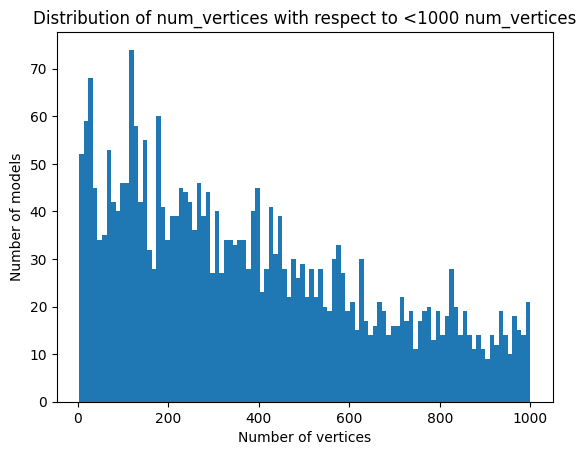

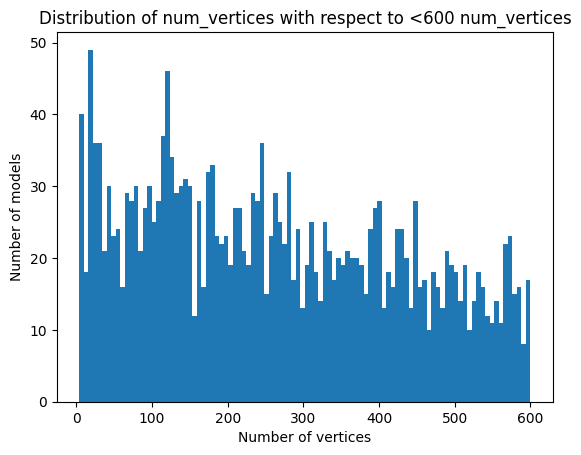

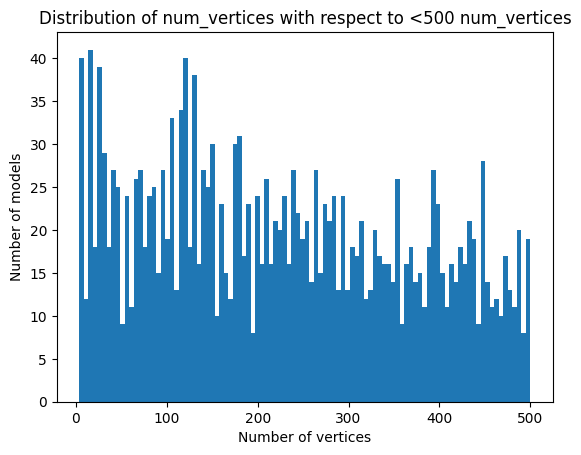

In [15]:
plot_hist(data, 'num_vertices', 1000)
plot_hist(data, 'num_vertices', 600)
plot_hist(data, 'num_vertices', 500)

In [16]:
# we need only ID, License, number of vertices and link columns
data_croppped = data[['ID', 'License', 'num_vertices', 'Link']]
data_croppped = data_croppped[data_croppped['num_vertices'] <= 500]
data_croppped.shape

(1986, 4)

# Downloading models

In [17]:
# download models by the link and save them to the folder
import urllib.request
import os
from tqdm import tqdm

In [18]:
PATH_TO_SAVE = "../data/Thingi10K/models"

num_models = data_croppped.shape[0]

In [13]:
for i in tqdm(range(num_models)):
    url = data_croppped.iloc[i]['Link']
    try:
        urllib.request.urlretrieve(url, os.path.join(PATH_TO_SAVE, str(i) + '.stl'))
    except:
        continue

100%|██████████| 1986/1986 [30:22<00:00,  1.09it/s] 


In [26]:
# delete non-stl files
incorrect = ["1255.stl", "1410.stl", "822.stl"]
for name in incorrect:
    if os.path.exists(PATH_TO_SAVE + "/" + name):
        os.remove(PATH_TO_SAVE + "/" + name)
        print(f"FILE {name} REMOVED.")

FILE 822.stl REMOVED.
